In [152]:
import pandas as pd
import locale
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import os

In [153]:
# Set locale a Mexico
locale.setlocale(locale.LC_ALL, 'es-MX')
# Directorio
os.chdir('D:/github/dataviz_varios/')

In [154]:
url="https://datos.cdmx.gob.mx/dataset/ee806dd2-c919-46f2-858f-6a55a05b8ee6/resource/176c0d20-0111-43bc-903c-d7e807ff37c0/download/afluencia_desglosada_cb_12_2022.csv"

In [155]:
#Leer los datos
df = pd.read_csv(url, encoding='latin-1')

In [156]:
#Transformar a fecha
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')
#Obtener el día de la semana en español
df['dia_semana'] = df['fecha'].dt.strftime('%A')
#Obtener el mes
df['mes'] = df['fecha'].dt.strftime('%B')
#Ordenar días de la semana
df['dia_semana'] = pd.Categorical(df['dia_semana'], categories=['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo'], ordered=True)
#Ordenar meses
df['mes'] = pd.Categorical(df['mes'], categories=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'], ordered=True)

In [157]:
df

,fecha,mes,anio,linea,tipo_pago,afluencia,dia_semana
0,2022-01-01,enero,2022,Linea 1,Prepago,24975,sábado
1,2022-01-01,enero,2022,Linea 1,Gratuidad,2175,sábado
2,2022-01-02,enero,2022,Linea 1,Prepago,31814,domingo
3,2022-01-02,enero,2022,Linea 1,Gratuidad,2597,domingo
4,2022-01-03,enero,2022,Linea 1,Prepago,36631,lunes
...,...,...,...,...,...,...,...
1455,2022-12-29,diciembre,2022,Linea 2,Gratuidad,6977,jueves
1456,2022-12-30,diciembre,2022,Linea 2,Prepago,54949,viernes
1457,2022-12-30,diciembre,2022,Linea 2,Gratuidad,7559,viernes
1458,2022-12-31,diciembre,2022,Linea 2,Prepago,45990,sábado


In [158]:
#Obtener la fecha más reciente
df['fecha'].max()

Timestamp('2022-12-31 00:00:00')

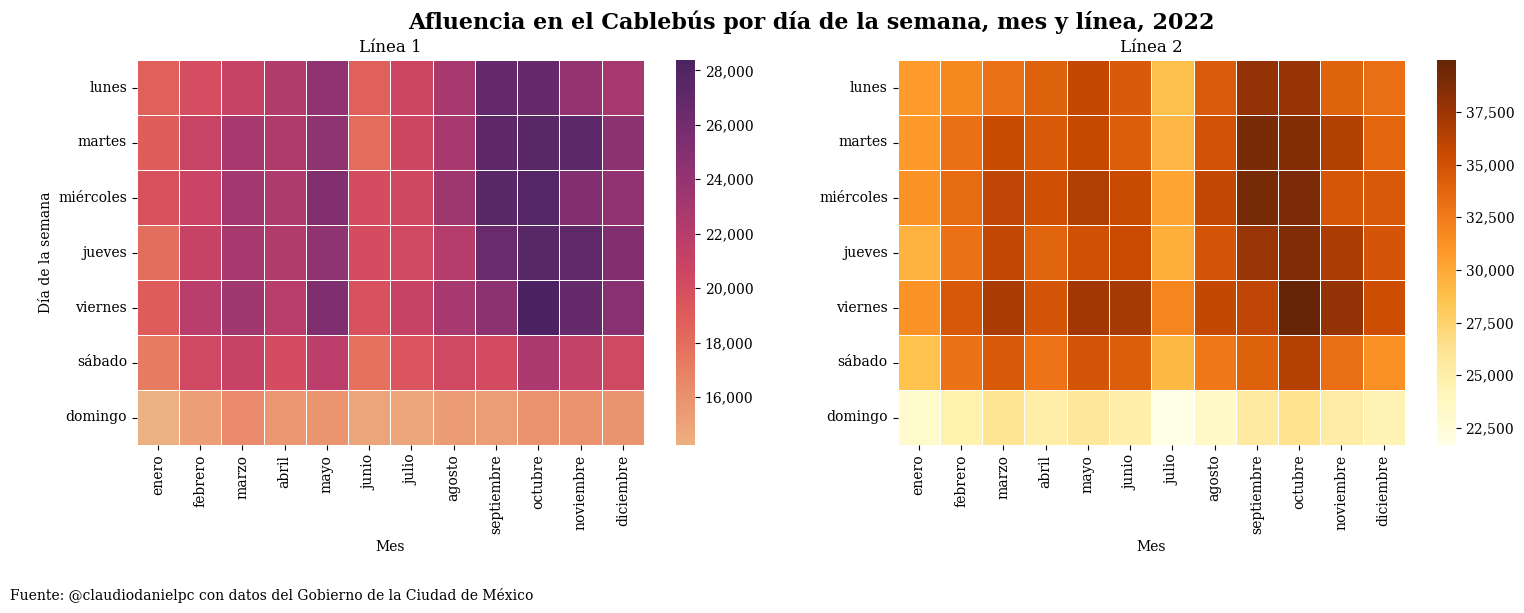

In [168]:
#Hacer dos heatmaps, uno para cada línea en la misma figura
#Crear una figura
plt.rcParams['font.family'] = 'Serif'
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
#Crear un heatmap para cada línea
sns.heatmap(df[df['linea'] == 'Linea 1'].pivot_table(index='dia_semana', columns='mes', 
                                                     values='afluencia'), cmap='flare', ax=ax[0],linecolor='white',
                                                     cbar_kws={'format': ticker.FuncFormatter(lambda x, p: format(int(x), ','))}, 
                                                     linewidths=0.5)
            
sns.heatmap(df[df['linea'] == 'Linea 2'].pivot_table(index='dia_semana', columns='mes', values='afluencia'), cmap='YlOrBr', ax=ax[1],
            linecolor='white', cbar_kws={'format': ticker.FuncFormatter(lambda x, p: format(int(x), ','))}, 
                                                     linewidths=0.5)
#Título
fig.suptitle('Afluencia en el Cablebús por día de la semana, mes y línea, 2022\n', fontsize=16, fontweight='bold')
#Título de los subplots
ax[0].set_title('Línea 1')
ax[1].set_title('Línea 2')
#Título de los ejes
ax[0].set_xlabel('Mes')
ax[0].set_ylabel('Día de la semana')
ax[1].set_xlabel('Mes')
ax[1].set_ylabel('')


#Fuente de los datos en la figura
fig.text(0.2, -0.2, 'Fuente: @claudiodanielpc con datos del Gobierno de la Ciudad de México', ha='center', fontsize=10)
#Guardar la figura
fig.savefig('afluencia_cablebus.png', dpi=300, bbox_inches='tight')